In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, max_error, mean_absolute_error, median_absolute_error, mean_squared_log_error

In [69]:
# Load the data
features_df = pd.read_csv("imdb_data_for_webapp.csv")
target_df = pd.read_csv("imdb_targeted_value_for_webapp.csv")

In [70]:
print(features_df.shape)
print(target_df.shape)

(2151, 8)
(2151, 1)


In [71]:
# Replace missing values with the mean
target_df.fillna(target_df.mean(), inplace=True)

In [72]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, test_size=0.2, random_state=1)

In [73]:
# Create the regressor models
rf_model = RandomForestRegressor(random_state=1)
lr_model = LinearRegression()
gb_model = GradientBoostingRegressor(random_state=1)
xgb_model = XGBRegressor(random_state=1)
dt_model = DecisionTreeRegressor(random_state=1)
knn_model = KNeighborsRegressor()

In [74]:
# Train the models
models = [rf_model, lr_model, gb_model, xgb_model, dt_model, knn_model]
for model in models:
    model.fit(X_train, y_train)

C:\Users\tejas\AppData\Local\Temp\ipykernel_20180\2986263029.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
c:\Users\tejas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [75]:
# Evaluate the models
for model in models:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    me = max_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    msle = mean_squared_log_error(y_test, np.clip(y_pred, 0, np.inf))
    medae = median_absolute_error(y_test, y_pred)
    print(f"Model: {type(model).__name__}\nMSE: {mse:.2f}\nR-squared: {r2:.2f}\nExplained Variance Score: {evs:.2f}\nMax Error: {me:.2f}\nMean Absolute Error: {mae:.2f}\nMean Squared Log Error: {msle:.2f}\nMedian Absolute Error: {medae:.2f}\n")

Model: RandomForestRegressor
MSE: 9035524417185016.00
R-squared: 0.50
Explained Variance Score: 0.50
Max Error: 905734316.46
Mean Absolute Error: 52239163.62
Mean Squared Log Error: 3.60
Median Absolute Error: 25238449.37

Model: LinearRegression
MSE: 9377508226356440.00
R-squared: 0.48
Explained Variance Score: 0.48
Max Error: 955999906.22
Mean Absolute Error: 51993086.70
Mean Squared Log Error: 23.02
Median Absolute Error: 23338948.32

Model: GradientBoostingRegressor
MSE: 10283000618832436.00
R-squared: 0.43
Explained Variance Score: 0.43
Max Error: 1117541812.86
Mean Absolute Error: 52093331.10
Mean Squared Log Error: 4.06
Median Absolute Error: 24770183.58

Model: XGBRegressor
MSE: 11324318979034024.00
R-squared: 0.37
Explained Variance Score: 0.37
Max Error: 1076882160.00
Mean Absolute Error: 56896916.49
Mean Squared Log Error: 13.61
Median Absolute Error: 25566708.00

Model: DecisionTreeRegressor
MSE: 17552778935347414.00
R-squared: 0.03
Explained Variance Score: 0.03
Max Error:

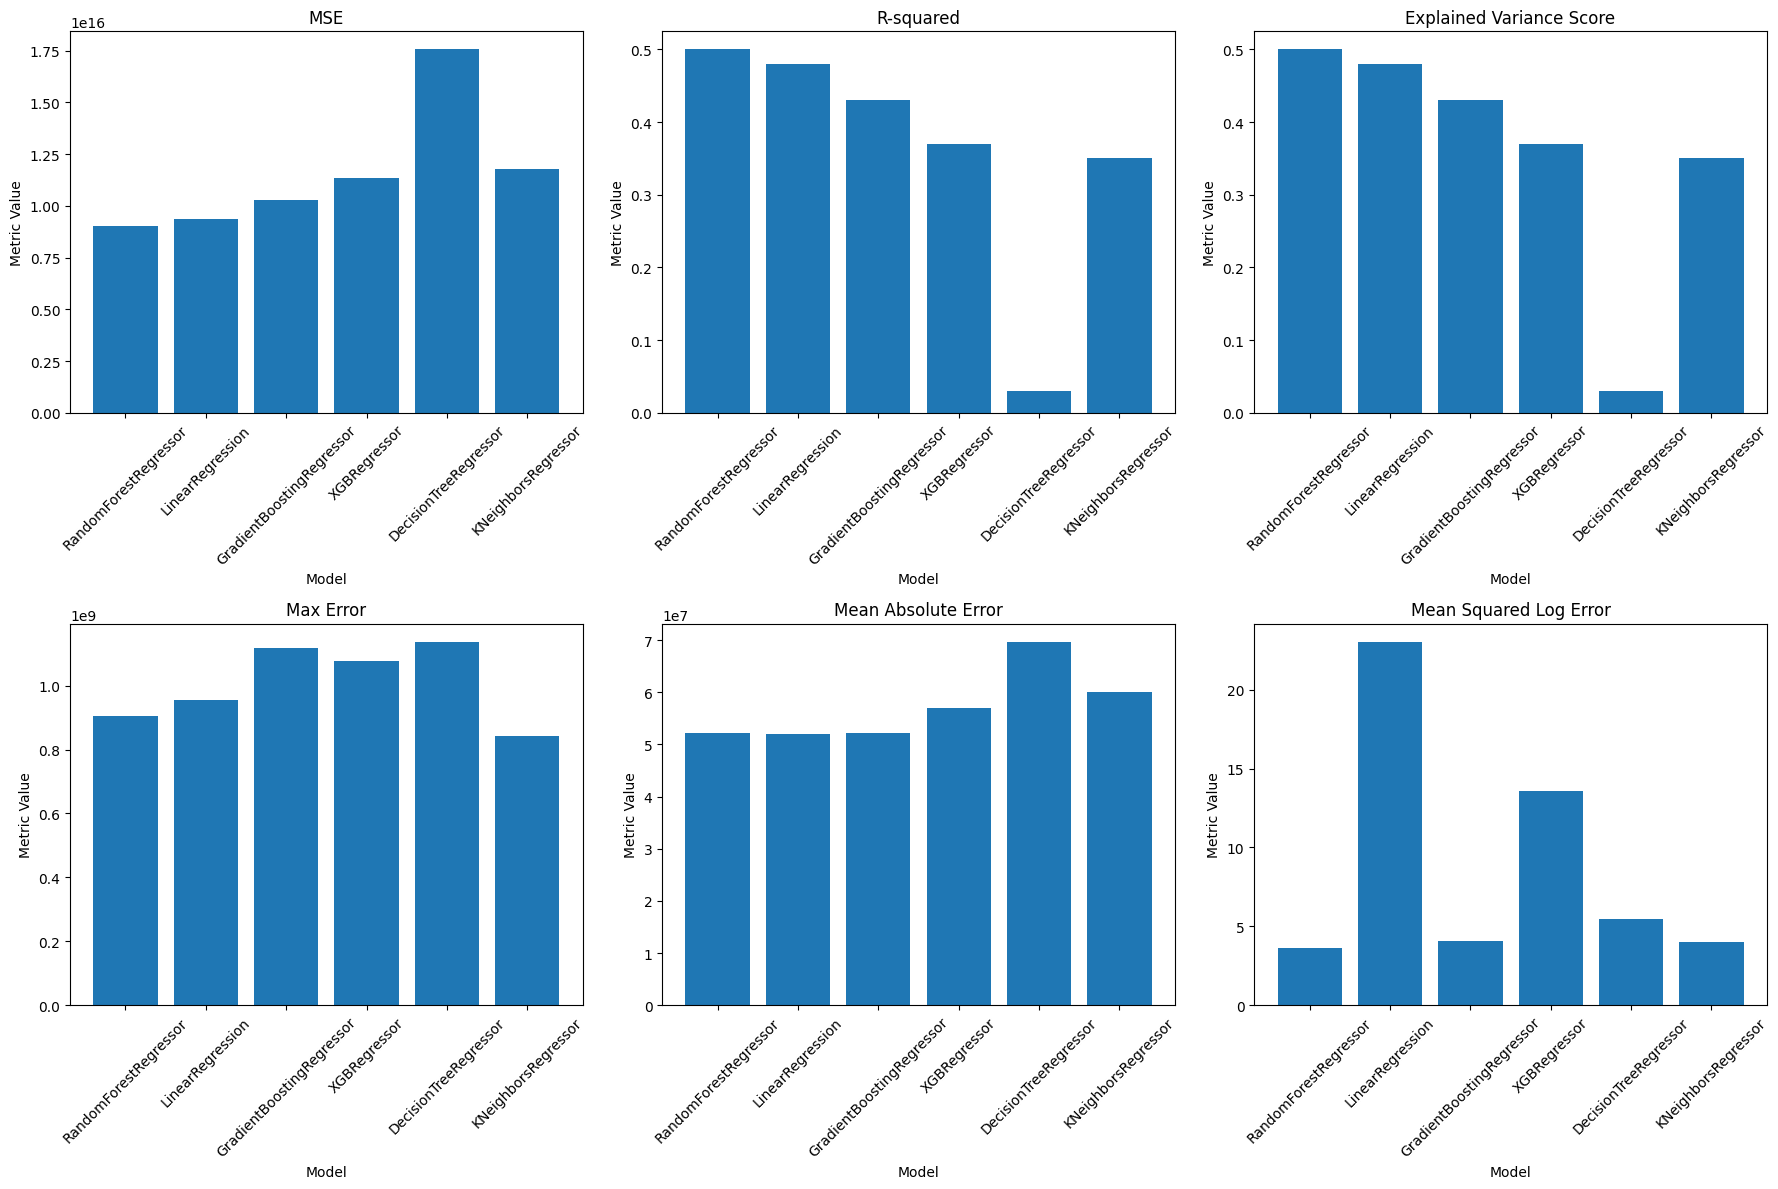

In [76]:
import matplotlib.pyplot as plt

# Metrics values for all models
models = ['RandomForestRegressor', 'LinearRegression', 'GradientBoostingRegressor', 'XGBRegressor', 'DecisionTreeRegressor', 'KNeighborsRegressor']
mse = [9035524417185016.00, 9377508226356440.00, 10283000618832436.00, 11324318979034024.00, 17552778935347414.00, 11785537395101006.00]
r2 = [0.50, 0.48, 0.43, 0.37, 0.03, 0.35]
evs = [0.50, 0.48, 0.43, 0.37, 0.03, 0.35]
me = [905734316.46, 955999906.22, 1117541812.86, 1076882160.00, 1136341397.00, 841892680.40]
mae = [52239163.62, 51993086.70, 52093331.10, 56896916.49, 69617281.43, 59984213.74]
msle = [3.60, 23.02, 4.06, 13.61, 5.48, 4.01]
medae = [25238449.37, 23338948.32, 24770183.58, 25566708.00, 27989896.00, 28380606.60]

# Plotting bar graphs for all the metrics
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

axs[0, 0].bar(models, mse)
axs[0, 0].set_title('MSE')
axs[0, 1].bar(models, r2)
axs[0, 1].set_title('R-squared')
axs[0, 2].bar(models, evs)
axs[0, 2].set_title('Explained Variance Score')
axs[1, 0].bar(models, me)
axs[1, 0].set_title('Max Error')
axs[1, 1].bar(models, mae)
axs[1, 1].set_title('Mean Absolute Error')
axs[1, 2].bar(models, msle)
axs[1, 2].set_title('Mean Squared Log Error')
for ax in axs.flat:
    ax.set(xlabel='Model', ylabel='Metric Value')
    ax.tick_params(axis='x', labelrotation=45)
plt.tight_layout()
plt.show()
